<img src="bay_wheels.png" style="width:1000px; height:500px"/>

## Lyft - Bay Wheels BikeShare Project

Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender


### Table of Contents
<ol>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href='#cleaning'>Data Cleaning</a></li>
<li><a href="#storing">Data Storing</a></li>
<li><a href="#univariate">Univariate</a></li>
<li><a href="#bivariate">Bivariate</a></li>
<li><a href="#multivariate">Multivariate</a></li>
<li><a href="#reference">Reference</a></li>


</ol>

#### <a id='gathering'></a>
## 1. Data Gathering

In [2]:
import requests
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# Given file
df1 = pd.read_csv('201901-fordgobike-tripdata.csv')
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


In [4]:
df2 = pd.read_csv('201902-fordgobike-tripdata.csv')
df3 = pd.read_csv('201903-fordgobike-tripdata.csv')
df4 = pd.read_csv('201904-fordgobike-tripdata.csv')
df5 = pd.read_csv('201905-baywheels-tripdata.csv')

In [5]:
# concatenate all 2019 bikeshare DataFrames
df = pd.concat([df1, df2, df3, df4, df5])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053067 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               1053067 non-null int64
start_time                 1053067 non-null object
end_time                   1053067 non-null object
start_station_id           1052322 non-null float64
start_station_name         1052322 non-null object
start_station_latitude     1053067 non-null float64
start_station_longitude    1053067 non-null float64
end_station_id             1052322 non-null float64
end_station_name           1052322 non-null object
end_station_latitude       1053067 non-null float64
end_station_longitude      1053067 non-null float64
bike_id                    1053067 non-null int64
user_type                  1053067 non-null object
member_birth_year          1003691 non-null float64
member_gender              1003697 non-null object
bike_share_for_all_trip    1053067 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 136.6+ MB
Non

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.053067e+06,1.052322e+06,1.053067e+06,1.053067e+06,1.052322e+06,1.053067e+06,1.053067e+06,1.053067e+06,1.003691e+06
mean,7.793630e+02,1.394330e+02,3.777006e+01,-1.223534e+02,1.378195e+02,3.776961e+01,-1.223510e+02,3.883042e+03,1.984671e+03
std,1.891006e+03,1.143622e+02,1.069203e-01,1.676838e-01,1.142789e+02,1.855866e-01,5.193068e-01,1.974972e+03,1.010330e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224537e+02,3.000000e+00,0.000000e+00,-1.224537e+02,1.100000e+01,1.878000e+03
25%,3.400000e+02,4.400000e+01,3.777008e+01,-1.224130e+02,4.400000e+01,3.777041e+01,-1.224117e+02,2.165000e+03,1.980000e+03
50%,5.420000e+02,1.020000e+02,3.778076e+01,-1.223984e+02,1.000000e+02,3.778095e+01,-1.223983e+02,4.549000e+03,1.987000e+03
75%,8.480000e+02,2.390000e+02,3.779728e+01,-1.222912e+02,2.350000e+02,3.779728e+01,-1.222914e+02,5.428000e+03,1.992000e+03
max,8.611400e+04,4.270000e+02,3.788022e+01,0.000000e+00,4.270000e+02,3.788022e+01,0.000000e+00,7.196000e+03,2.001000e+03


In [7]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
151000,689,2019-01-09 13:15:40.6880,2019-01-09 13:27:10.0000,52.0,McAllister St at Baker St,37.777416,-122.441838,86.0,Market St at Dolores St,37.769305,-122.426826,444,Subscriber,1974.0,Male,Yes
4183,543,2019-01-31 16:15:35.5930,2019-01-31 16:24:39.4360,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,757,Subscriber,1968.0,Male,No
4870,305,2019-03-31 12:34:38.3000,2019-03-31 12:39:44.0380,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6945,Subscriber,1957.0,Male,No
8162,905,2019-01-31 08:16:58.0980,2019-01-31 08:32:03.5770,130.0,22nd St Caltrain Station,37.757718,-122.391813,19.0,Post St at Kearny St,37.788975,-122.403452,5522,Subscriber,1994.0,Male,No
136501,1188,2019-05-08 08:32:35.0010,2019-05-08 08:52:23.3360,55.0,Webster St at Grove St,37.777053,-122.429558,104.0,4th St at 16th St,37.767045,-122.390833,1245,Subscriber,1987.0,Female,No
48288,402,2019-05-23 15:16:33.8890,2019-05-23 15:23:16.5380,81.0,Berry St at 4th St,37.775880,-122.393170,343.0,Bryant St at 2nd St,37.783172,-122.393572,2820,Subscriber,1977.0,Female,No
114068,695,2019-03-18 18:31:37.6520,2019-03-18 18:43:13.2930,355.0,23rd St at Tennessee St,37.755367,-122.388795,147.0,29th St at Tiffany Ave,37.744067,-122.421472,4831,Subscriber,NaN,NaN,No
103034,312,2019-03-19 18:16:58.4240,2019-03-19 18:22:10.8990,37.0,2nd St at Folsom St,37.785377,-122.396906,81.0,Berry St at 4th St,37.775880,-122.393170,6743,Subscriber,1982.0,Male,No
138500,171,2019-04-11 07:47:05.4910,2019-04-11 07:49:57.1180,112.0,Harrison St at 17th St,37.763847,-122.413004,114.0,Rhode Island St at 17th St,37.764478,-122.402570,4810,Subscriber,1978.0,Male,No
154027,770,2019-05-05 14:42:18.6280,2019-05-05 14:55:09.6070,134.0,Valencia St at 24th St,37.752428,-122.420628,76.0,McCoppin St at Valencia St,37.771662,-122.422423,357,Subscriber,1991.0,Female,No


In [8]:
# see if there is duplictaed columns
print(sum(df.duplicated()))
print(df.nunique())

0
duration_sec                 10619
start_time                 1052985
end_time                   1052985
start_station_id               369
start_station_name             370
start_station_latitude         380
start_station_longitude        383
end_station_id                 369
end_station_name               370
end_station_latitude           381
end_station_longitude          384
bike_id                       5672
user_type                        2
member_birth_year               84
member_gender                    3
bike_share_for_all_trip          2
dtype: int64


#### <a id='assessing'></a>
## 2. Data Assessing

#### Quality

1. start time and end time should be datetime dtype. 
2. Change user type, gender and bike_share_for_all_trip dtype to category and change bike id, start_station_id, end_station_id dtype as object
3. There is a member who was born in 1878..
4. We can create a new column for 'age' of each member
5. Create the 'distance' column between stations
6. Delte 0 value of start_station_latitude, start_station_longitude, end_station_latitude,end_station_longitude    

#### <a id='cleaning'></a>
## 3. Data Cleaning

In [9]:
# Create copies of original DataFrames to work off of
df_copy = df.copy()
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


**Define**

1. start time and end time should be datetime dtype. 

**Code**

In [10]:
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

**Test**

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053067 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               1053067 non-null int64
start_time                 1053067 non-null datetime64[ns]
end_time                   1053067 non-null datetime64[ns]
start_station_id           1052322 non-null float64
start_station_name         1052322 non-null object
start_station_latitude     1053067 non-null float64
start_station_longitude    1053067 non-null float64
end_station_id             1052322 non-null float64
end_station_name           1052322 non-null object
end_station_latitude       1053067 non-null float64
end_station_longitude      1053067 non-null float64
bike_id                    1053067 non-null int64
user_type                  1053067 non-null object
member_birth_year          1003691 non-null float64
member_gender              1003697 non-null object
bike_share_for_all_trip    1053067 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), ob

**Define**

  2-A. change user type, gender and bike_share_for_all_trip dtype to category; change member_birth_year to integer 

  2-B. change bike id, start_station_id, end_station_id dtype as object

**Code**

In [12]:
df_copy['user_type'] = df_copy['user_type'].astype('category')
df_copy['member_gender'] = df_copy['member_gender'].astype('category')
df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('category')
df_copy.bike_id = df_copy.bike_id.astype(str)
df_copy.start_station_id = df_copy.start_station_id.astype(str)
df_copy.end_station_id = df_copy.end_station_id.astype(str)

**Test**

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053067 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               1053067 non-null int64
start_time                 1053067 non-null datetime64[ns]
end_time                   1053067 non-null datetime64[ns]
start_station_id           1053067 non-null object
start_station_name         1052322 non-null object
start_station_latitude     1053067 non-null float64
start_station_longitude    1053067 non-null float64
end_station_id             1053067 non-null object
end_station_name           1052322 non-null object
end_station_latitude       1053067 non-null float64
end_station_longitude      1053067 non-null float64
bike_id                    1053067 non-null object
user_type                  1053067 non-null category
member_birth_year          1003691 non-null float64
member_gender              1003697 non-null category
bike_share_for_all_trip    1053067 non-null category
dtypes: category(3), datetime64[ns](2), float6

**Define**
3. There is a member who was born in 1878. We need to delete those columns with unrealistic ages.

    According to Wikipedia, since the death of 113-year-old Masazō Nonaka of Japan on 20 January 2019, 113-year-old Gustav Gerneth of Germany, born 15 October **1905**, is the world's oldest living man.
    https://en.wikipedia.org/wiki/Oldest_people

**Code**

In [14]:
# check there are 432 people with unrealistic ages

unreal_ages = df.query('member_birth_year < 1905')
unreal_ages.count()

duration_sec               432
start_time                 432
end_time                   432
start_station_id           432
start_station_name         432
start_station_latitude     432
start_station_longitude    432
end_station_id             432
end_station_name           432
end_station_latitude       432
end_station_longitude      432
bike_id                    432
user_type                  432
member_birth_year          432
member_gender              432
bike_share_for_all_trip    432
dtype: int64

In [15]:
# delte all rows with member_birth_year less than 1905
df_copy = df_copy[df_copy['member_birth_year'] > 1905]

**Test**

In [16]:
df_copy[df_copy['member_birth_year']<1905].count()
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int')

**Define**

4. We can create a new column for 'age' of each member by subtracting 'member_birth_year' column from 2019

**Code**

In [17]:
df_copy['age'] = 2019 - df_copy.member_birth_year

**Test**

In [18]:
df_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989,Male,No,30
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989,Male,No,30
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965,Female,No,54


**Define**

5. Create the day, month columns

**Code**

In [38]:
df_copy['start_time_month']=df_copy['start_time'].dt.strftime('%b')
df_copy['start_time_month_num']=df_copy['start_time'].dt.month.astype(int)

df_copy['start_time_day']=df_copy['start_time'].dt.strftime('%a')
df_copy['start_time_hour']=df_copy['start_time'].dt.hour

**Test**

In [39]:
df_copy.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_time_month,start_time_month_num,start_time_day,start_time_hour
157841,446,2019-03-14 05:31:18.412,2019-03-14 05:38:45.343,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,312.0,San Jose Diridon Station,37.329732,...,1058,Subscriber,1971,Male,No,48,Mar,3,Thu,5
59451,749,2019-05-22 07:04:47.545,2019-05-22 07:17:17.388,171.0,Rockridge BART Station,37.844279,-122.251900,181.0,Grand Ave at Webster St,37.811377,...,1143,Subscriber,1965,Male,No,54,May,5,Wed,7
212943,383,2019-04-03 17:41:01.969,2019-04-03 17:47:25.933,312.0,San Jose Diridon Station,37.329732,-121.901782,305.0,Ryland Park,37.342725,...,5733,Subscriber,1988,Male,No,31,Apr,4,Wed,17


In [21]:
df_copy.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,start_time_month_num,start_time_hour
count,1.003259e+06,1.003259e+06,1.003259e+06,1.003259e+06,1.003259e+06,1.003259e+06,1.003259e+06,1.003259e+06,1.003259e+06
mean,7.480446e+02,3.776962e+01,-1.223521e+02,3.776913e+01,-1.223495e+02,1.984708e+03,3.429222e+01,3.035337e+00,1.357881e+01
std,1.718367e+03,1.085494e-01,1.706751e-01,1.895675e-01,5.316750e-01,9.949797e+00,9.949797e+00,1.348825e+00,4.771746e+00
min,6.100000e+01,0.000000e+00,-1.224537e+02,0.000000e+00,-1.224537e+02,1.910000e+03,1.800000e+01,1.000000e+00,0.000000e+00
25%,3.370000e+02,3.777008e+01,-1.224125e+02,3.777041e+01,-1.224117e+02,1.980000e+03,2.700000e+01,2.000000e+00,9.000000e+00
50%,5.360000e+02,3.778079e+01,-1.223983e+02,3.778101e+01,-1.223974e+02,1.987000e+03,3.200000e+01,3.000000e+00,1.400000e+01
75%,8.360000e+02,3.779728e+01,-1.222887e+02,3.779732e+01,-1.222894e+02,1.992000e+03,3.900000e+01,4.000000e+00,1.700000e+01
max,8.611400e+04,3.788022e+01,0.000000e+00,3.788022e+01,0.000000e+00,2.001000e+03,1.090000e+02,5.000000e+00,2.300000e+01


**Define**

6. Delte 0 value of start_station_latitude, start_station_longitude, end_station_latitude,end_station_longitude

Zero degrees latitude is the line designating the Equator and divides the Earth into two equal hemispheres (north and south).  Zero degrees longitude is an imaginary line known as the Prime Meridian.  Therefore, we are looking for what exists at the location where the Equator and the Prime Meridian cross each other. https://www.geolounge.com/zero-degrees-latitude-and-zero-degrees-longitude/

**Code**

In [22]:
df_copy.query('start_station_latitude=="0"')
df_copy = df_copy[df_copy['start_station_latitude'] != 0.0]
df_copy = df_copy[df_copy['start_station_longitude'] != 0.0]
df_copy = df_copy[df_copy['end_station_latitude'] != 0.0]
df_copy = df_copy[df_copy['end_station_longitude'] != 0.0]

**Test**

In [23]:
df_copy.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,start_time_month_num,start_time_hour
count,1.003240e+06,1.003240e+06,1.003240e+06,1.003240e+06,1.003240e+06,1.003240e+06,1.003240e+06,1.003240e+06,1.003240e+06
mean,7.480397e+02,3.776966e+01,-1.223522e+02,3.776981e+01,-1.223517e+02,1.984708e+03,3.429222e+01,3.035319e+00,1.357876e+01
std,1.718382e+03,1.017902e-01,1.192004e-01,1.016948e-01,1.187409e-01,9.949815e+00,9.949815e+00,1.348832e+00,4.771767e+00
min,6.100000e+01,3.731128e+01,-1.224537e+02,3.731128e+01,-1.224537e+02,1.910000e+03,1.800000e+01,1.000000e+00,0.000000e+00
25%,3.370000e+02,3.777008e+01,-1.224125e+02,3.777041e+01,-1.224117e+02,1.980000e+03,2.700000e+01,2.000000e+00,9.000000e+00
50%,5.360000e+02,3.778079e+01,-1.223983e+02,3.778101e+01,-1.223974e+02,1.987000e+03,3.200000e+01,3.000000e+00,1.400000e+01
75%,8.360000e+02,3.779728e+01,-1.222887e+02,3.779732e+01,-1.222894e+02,1.992000e+03,3.900000e+01,4.000000e+00,1.700000e+01
max,8.611400e+04,3.788022e+01,-1.218701e+02,3.788022e+01,-1.218701e+02,2.001000e+03,1.090000e+02,5.000000e+00,2.300000e+01


In [24]:
df_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_time_month,start_time_month_num,start_time_day,start_time_hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,4861,Subscriber,1989,Male,No,30,Jan,1,Thu,17
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,5506,Subscriber,1989,Male,No,30,Jan,1,Thu,20
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,2717,Customer,1965,Female,No,54,Jan,1,Thu,18


#### <a id='storing'></a>
## 4. Storing Data

In [25]:
df_copy.to_csv('baywheels_master.csv', index = False)

#### <a id='univariate'></a>
## Univariate Visualization

In [26]:
visual_master = df_copy.copy()

The main findings that I will explore are below:
- How long does the average trip take?
- What is weekly usage of BayWheels?
- What is proportion of BayWheels user type?
- Trip duration Per User Type based on Gender?

### A. How long does the average trip takes?

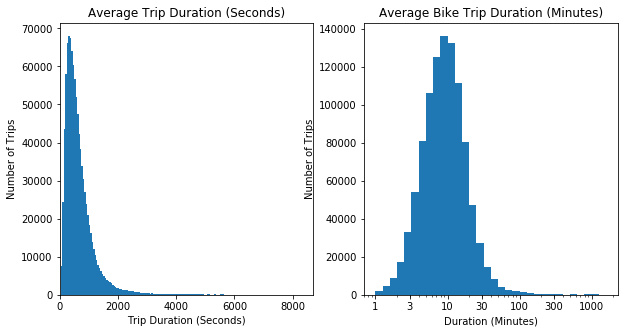

In [27]:
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
bins = np.arange(0, visual_master['duration_sec'].max()+ 0, 50)
plt.hist(data=visual_master, x = 'duration_sec', bins = bins)
plt.xlim(0,8700)
plt.title('Average Trip Duration (Seconds)')
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Number of Trips')

# Transform into log to better understand the data
plt.subplot(1,2,2)
visual_master['duration_min'] = visual_master['duration_sec']/60
bins = 10**np.arange(0 , np.log10(visual_master['duration_min'].max())+0.1, 0.1)
ticks =  [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(tick) for tick in ticks]
plt.hist(data = visual_master , x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

In [28]:
print(visual_master['duration_min'].mean())
np.log10(visual_master['duration_min'].min()), np.log10(visual_master['duration_min'].max())

12.467328106933834


(0.007178584627123376, 3.156922512318342)

### B. Weekly Usage of BayWheels

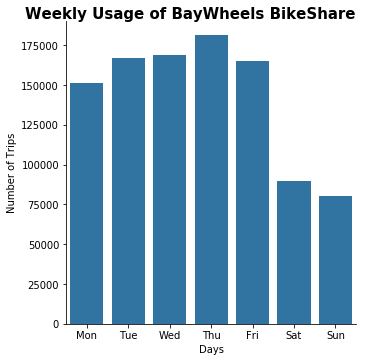

In [29]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
g = sb.catplot(data = visual_master, x='start_time_day', kind ='count', color=base_color, order = days)
g.set_axis_labels('Days', 'Number of Trips')
g.fig.suptitle('Weekly Usage of BayWheels BikeShare', y=1, fontsize=15, fontweight='demibold');

- BikeShare people use BayWheels on weekdays(M-F) with the average number of trips more than 150,000 times in 2019 (Jan-May). 
- It is interesting to see that they use BayWheels much less during weekends. 

### C. User Type of BayWheels

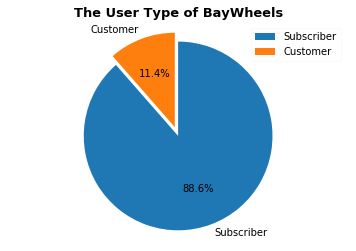

In [30]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Subscriber', 'Customer']
sizes = visual_master['user_type'].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, counterclock=False, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('The User Type of BayWheels', size = 13, fontweight = 'demibold')
plt.legend(loc = 1, ncol = 1, framealpha = 0.1);

**Analysis**

The BayWheels platform is generally employed by **88.6% of Subscribers** and **11.4% of daily Customers** 

### D. Hourly Usage of the BayWheels Trips

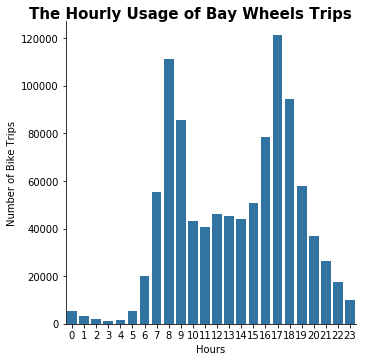

In [41]:
# bike sharing system hourly usage. 
g = sb.catplot(data=visual_master, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "Number of Bike Trips")
g.fig.suptitle('The Hourly Usage of Bay Wheels Trips', y=1.0, fontsize=15, fontweight='demibold');

#### <a id='bivariate'></a>
## 6. Bivariate Visualization

### E. The relationship Between User Type and Trip Duration

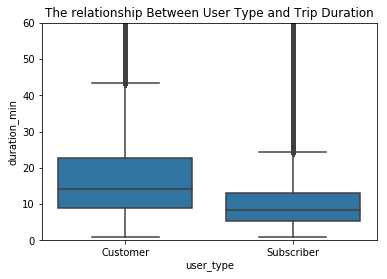

In [40]:
sb.boxplot(data = visual_master, x='user_type', y='duration_min', color = base_color)
plt.title('The relationship Between User Type and Trip Duration')
plt.ylim(0,60);

**Analysis**
1. The median of trip duration of customers is 12 min, while it's 9 min for subscribers.
2. For BayWheels customers, interquartile range (IQR: 25th to the 75th percentile) is between 9 min to 23 min. 
3. For BayWheels subscribers, IQR is between 6 min to 14 min. 
4. The maximum (Q3 + 1.5 * IQR) for customers is 43 min, but we can observe that there are so many ourliers.
5. The maximum for subscribers is 24 min. We can observe that there are so many ourliers as well. 

Which means, most of both customers and subscribers finish trips within 43 min, but there are many other people riding Baywheels for longer duration of time. 


#### <a id='multivariate'></a>
## 7. Multivariate Visualization

In this section, I will explore more about the relatinoship between user type, trip duration and **gender**

### F.  The Relatinoship Among User Type and Number of Trips and Gender

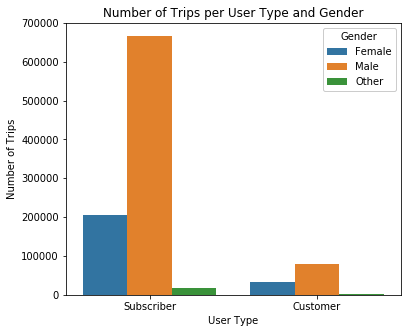

In [33]:
plt.figure(figsize = [6, 5])

# code for the bar chart
g = sb.countplot(data=visual_master, x="user_type", hue="member_gender",
                 order = visual_master.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Number of Trips')
plt.title('Number of Trips per User Type and Gender')
g.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Gender');

**Analysis**

- In summary, males are using lyft's BayWheels platform way more than females and others. 
- One insight that I found is that the ratio between male and female for **Subscriber** is about 3:1 while the ratio is 2:1 for **Customer**. 

### G. Monthly, Weekly & Hourly Usage of Baywheels Per User Type and Gender

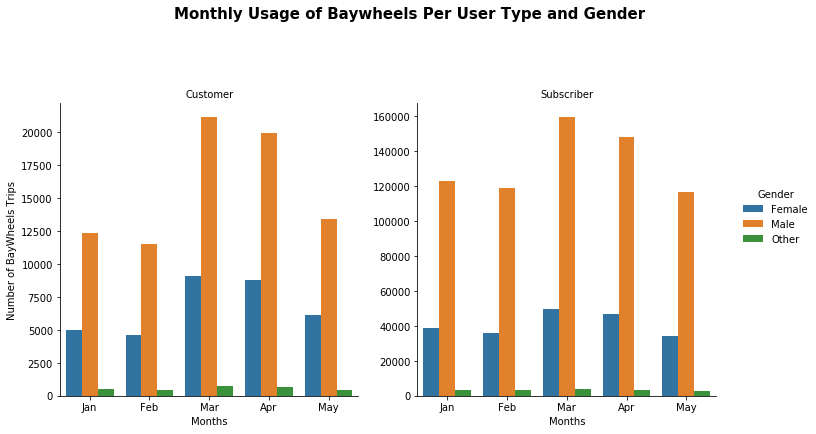

In [34]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
g = sb.catplot(data=visual_master, x='start_time_month', col='user_type', hue='member_gender', kind='count', sharey = False,
                order = months)
g.set_axis_labels("Months", "Number of BayWheels Trips")
g.set_titles("{col_name}")
g._legend.set_title('Gender')
g.fig.suptitle('Monthly Usage of Baywheels Per User Type and Gender', y=1.2, fontsize=15, fontweight='demibold');


- The difference of monthly usage between customer and subscriber is not really obvious. 
- The ratio between male and female on **customer side is about 2:1** and **3:1 on subscriber side**

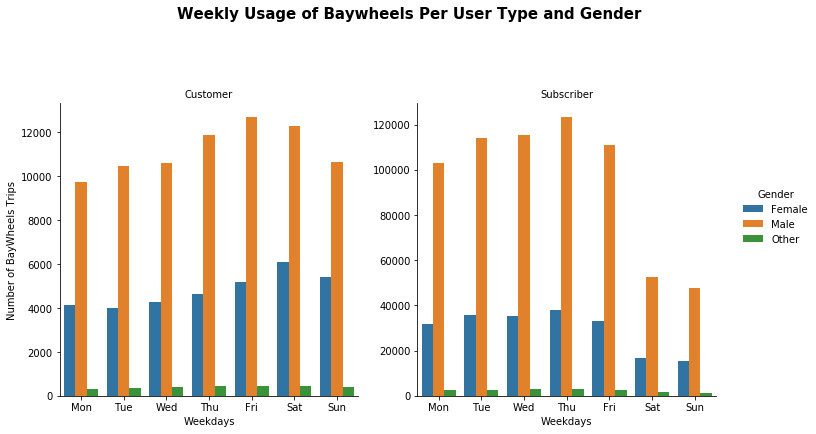

In [35]:
g = sb.catplot(data=visual_master, x='start_time_day', col='user_type', hue='member_gender', kind='count', sharey = False,
                order = days)
g.set_axis_labels("Weekdays", "Number of BayWheels Trips")
g.set_titles("{col_name}")
g._legend.set_title('Gender')
g.fig.suptitle('Weekly Usage of Baywheels Per User Type and Gender', y=1.2, fontsize=15, fontweight='demibold');


- We can see more clearly again that subscribers use BayWheels much less during weekends; those subscribers tend to use bikeshare for commute to work, while customers use BayWheels the most during weekend (Friday - Saturday).


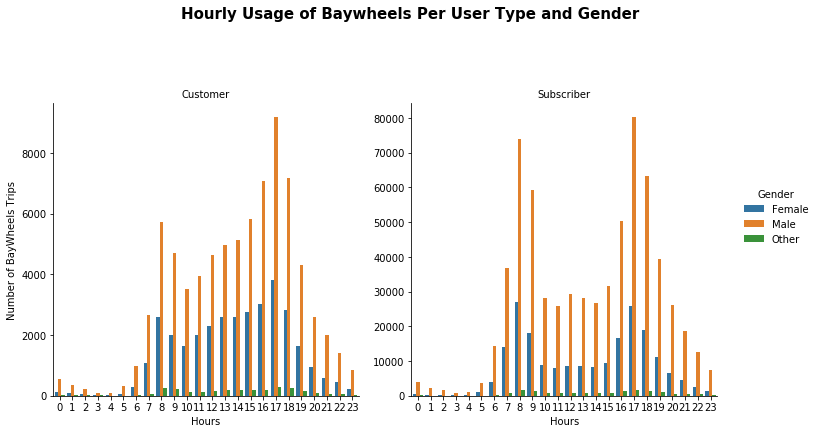

In [36]:
g = sb.catplot(data=visual_master, x='start_time_hour', col='user_type', hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hours", "Number of BayWheels Trips")
g.set_titles("{col_name}")
g._legend.set_title('Gender')
g.fig.suptitle('Hourly Usage of Baywheels Per User Type and Gender', y=1.2, fontsize=15, fontweight='demibold');

- We can see there are lots of male subscrbiers who highly likely use bayWheels for commute to work (7-9AM & 4-6PM)
- There are a large number of male customers who use BayWheels around 4-6PM during weekends

### H.  The Trip Duration per User Type and Gender

(0, 60)

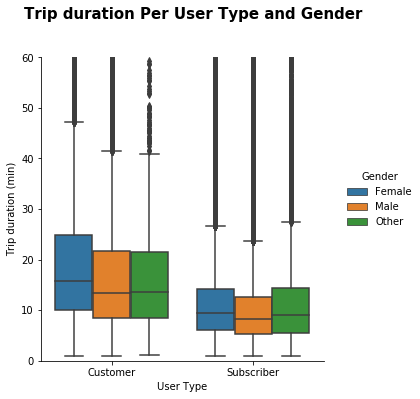

In [37]:
# code for the (violinplot) duration (sec) distribution per user type and gender

g = sb.catplot(data=visual_master,x='user_type', y="duration_min", hue="member_gender", kind="box")
g.set_axis_labels("User Type", "Trip duration (min)")
g.fig.suptitle('Trip duration Per User Type and Gender', y=1.1, fontsize=15, fontweight='demibold')
g._legend.set_title('Gender')
plt.ylim(0,60)

**Analysis**
1. On the customer side, females take longer trips than males and others.
2. On the Sucscriber side, females take longer trips than males but similar to others
3. It is more distinct on the customer side that females take approximately 25 min trip, but both males and others take about 21 min.

#### <a id='reference'></a>
### 8. Reference

- https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
- https://www.geolounge.com/zero-degrees-latitude-and-zero-degrees-longitude/
- https://en.wikipedia.org/wiki/Oldest_people